In [709]:
import pandas as pd

In [710]:
df = pd.read_csv('data/test/오존.csv')
df1 = pd.read_csv('data/test/평균기온.csv')
df2 = pd.read_csv('data/test/평균최고기온.csv')
df3 = pd.read_csv('data/test/평균최저기온.csv')
df4 = pd.read_csv('data/test/평균증기압.csv')

In [711]:
# df와 df1을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(df, df1, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [712]:
# result_df와 df2을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(result_df, df2, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [713]:
# result_df와 df3을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(result_df, df3, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [714]:
# result_df와 df4을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(result_df, df4, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [715]:
result_df.head(2)

,SIDO,STD_YYYYMM,AVG_오존,오존_BAD,오존0.06_BAD,오존0.1_BAD,평균기온,평균최고기온,평균최저기온,평균증기압
0,서울특별시,201001,0.011,N,N,N,-4.5,-0.7,-8.1,3.1
1,부산광역시,201001,0.021,N,N,N,3.0,7.7,-1.1,3.5


In [716]:
dd = result_df['STD_YYYYMM'].dtype

print(f"result_df['STD_YYYYMM'].dtype: {dd}")

result_df['STD_YYYYMM'].dtype: int64


In [717]:
# 그룹별로 NaN 값을 평균값으로 대체
result_df['AVG_오존'] = result_df.groupby(['SIDO', 'STD_YYYYMM'])['AVG_오존'].transform(lambda x: x.fillna(x.mean()))
# 필요한 경우, 여전히 NaN 값이 있는 경우에 대비해 전체 평균값으로 대체할 수도 있습니다
result_df['AVG_오존'] = result_df['AVG_오존'].fillna(result_df['AVG_오존'].mean())
result_df.isna().sum()

SIDO          0
STD_YYYYMM    0
AVG_오존        0
오존_BAD        0
오존0.06_BAD    0
오존0.1_BAD     0
평균기온          0
평균최고기온        0
평균최저기온        0
평균증기압         0
dtype: int64

In [718]:
result_df.tail()

,SIDO,STD_YYYYMM,AVG_오존,오존_BAD,오존0.06_BAD,오존0.1_BAD,평균기온,평균최고기온,평균최저기온,평균증기압
2491,충청남도,202212,0.0218,N,N,N,-2.2,3.1,-6.9,3.8
2492,전라북도,202212,0.0230,N,N,N,-1.1,4.1,-5.7,4.0
2493,전라남도,202212,0.0248,N,N,N,2.1,6.6,-1.9,4.7
2494,경상북도,202212,0.0240,N,N,N,-1.1,4.1,-5.8,3.3
2495,제주특별자치도,202212,0.0365,Y,N,N,6.8,9.8,4.0,6.6


In [719]:
# 'SIDO' 열에서 '서울특별시'인 행만 필터링
seoul_df = result_df[result_df['SIDO'] == '서울특별시']


In [720]:
# 'STD_YYYYMM'을 인덱스로 사용
seoul_df['STD_YYYYMM'] = pd.to_datetime(seoul_df['STD_YYYYMM'], format='%Y%m')
seoul_df = seoul_df.set_index('STD_YYYYMM')

C:\Users\human\AppData\Local\Temp\ipykernel_15884\1799982633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_df['STD_YYYYMM'] = pd.to_datetime(seoul_df['STD_YYYYMM'], format='%Y%m')


In [721]:
seoul_df.tail(2)

,SIDO,AVG_오존,오존_BAD,오존0.06_BAD,오존0.1_BAD,평균기온,평균최고기온,평균최저기온,평균증기압
STD_YYYYMM,,,,,,,,,
2022-11-01,서울특별시,0.018,N,N,N,10.0,15.4,5.6,8.2
2022-12-01,서울특별시,0.015,N,N,N,-2.8,1.7,-6.6,3.1


In [722]:
# 원래의 'SIDO' 열 삭제
seoul_df.drop('SIDO', axis=1, inplace=True)

In [723]:
seoul_df.head()

,AVG_오존,오존_BAD,오존0.06_BAD,오존0.1_BAD,평균기온,평균최고기온,평균최저기온,평균증기압
STD_YYYYMM,,,,,,,,
2010-01-01,0.011,N,N,N,-4.5,-0.7,-8.1,3.1
2010-02-01,0.016,N,N,N,1.4,4.9,-1.7,4.5
2010-03-01,0.024,N,N,N,4.3,8.1,0.5,4.9
2010-04-01,0.026,N,N,N,9.5,14.0,5.6,6.5
2010-05-01,0.030,Y,N,N,17.2,22.0,13.0,11.9


In [724]:
# 열 이름에 'BAD' 문자열을 포함하는 열을 찾아 삭제
seoul_df = seoul_df.loc[:, ~seoul_df.columns.str.contains('BAD')]


In [725]:
seoul_df.tail(10)

,AVG_오존,평균기온,평균최고기온,평균최저기온,평균증기압
STD_YYYYMM,,,,,
2022-03-01,0.028,7.7,12.7,3.2,6.7
2022-04-01,0.043,14.8,20.6,10.0,9.2
2022-05-01,0.049,19.1,25.0,13.9,12.0
2022-06-01,0.036,23.3,27.5,19.8,20.9
2022-07-01,0.037,27.3,31.0,24.2,27.7
2022-08-01,0.030,25.7,28.9,23.1,26.6
2022-09-01,0.031,22.4,27.2,18.2,18.2
2022-10-01,0.023,14.6,19.7,10.3,11.6
2022-11-01,0.018,10.0,15.4,5.6,8.2


In [726]:
seoul_df.columns.value_counts()

AVG_오존    1
평균기온      1
평균최고기온    1
평균최저기온    1
평균증기압     1
Name: count, dtype: int64

In [727]:
seoul_df

,AVG_오존,평균기온,평균최고기온,평균최저기온,평균증기압
STD_YYYYMM,,,,,
2010-01-01,0.011,-4.5,-0.7,-8.1,3.1
2010-02-01,0.016,1.4,4.9,-1.7,4.5
2010-03-01,0.024,4.3,8.1,0.5,4.9
2010-04-01,0.026,9.5,14.0,5.6,6.5
2010-05-01,0.030,17.2,22.0,13.0,11.9
...,...,...,...,...,...
2022-08-01,0.030,25.7,28.9,23.1,26.6
2022-09-01,0.031,22.4,27.2,18.2,18.2
2022-10-01,0.023,14.6,19.7,10.3,11.6


In [728]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [736]:
# 데이터셋 준비 (이미 원-핫 인코딩 및 NaN 처리 완료)
data = seoul_df.values

# 데이터 정규화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 데이터셋 분할
n_train = int(0.2 * len(data_scaled))
train_data = data_scaled[:n_train]
test_data = data_scaled[n_train:]
train_dates = seoul_df.index[:n_train]
test_dates = seoul_df.index[n_train:]

# 데이터셋 재구성
seq_len = 20  # 수치구성방법 총 데이터의수 20%가 최대치 (수치를 조정해서 모델 적중률 조정)
input_dim = train_data.shape[1]  # 입력 차원 (원-핫 인코딩된 열의 수)

trainX, trainY = [], []
testX, testY = [], []

for i in range(seq_len, len(train_data)):
    trainX.append(train_data[i-seq_len:i, :])
    trainY.append(train_data[i, 0])  # 첫 번째 열이 타겟 변수라고 가정

for i in range(seq_len, len(test_data)):
    testX.append(test_data[i-seq_len:i, :])
    testY.append(test_data[i, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(64, input_shape=(seq_len, input_dim), return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(1))  # 하나의 출력 뉴런

# 모델 컴파일 및 학습
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
model.fit(trainX, trainY, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

# 예측 및 역변환
prediction = model.predict(testX)
prediction_transformed = scaler.inverse_transform(np.concatenate((prediction, np.zeros((prediction.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]

testY_transformed = scaler.inverse_transform(np.concatenate((testY.reshape(-1,1), np.zeros((testY.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]




Epoch 1/30
1/1 [==============================] - 4s 4s/step - loss: 0.9602 - val_loss: 1.2335
Epoch 2/30
1/1 [==============================] - 0s 44ms/step - loss: 0.4461 - val_loss: 0.8617
Epoch 3/30
1/1 [==============================] - 0s 42ms/step - loss: 0.2272 - val_loss: 0.4603
Epoch 4/30
1/1 [==============================] - 0s 42ms/step - loss: 0.1103 - val_loss: 0.5383
Epoch 5/30
1/1 [==============================] - 0s 40ms/step - loss: 0.0653 - val_loss: 0.6973
Epoch 6/30
1/1 [==============================] - 0s 40ms/step - loss: 0.1067 - val_loss: 1.0972
Epoch 7/30
1/1 [==============================] - 0s 40ms/step - loss: 0.1145 - val_loss: 0.8038
Epoch 8/30
1/1 [==============================] - 0s 41ms/step - loss: 0.0402 - val_loss: 0.6100
Epoch 9/30
1/1 [==============================] - 0s 43ms/step - loss: 0.0530 - val_loss: 0.5642
Epoch 10/30
1/1 [==============================] - 0s 46ms/step - loss: 0.0305 - val_loss: 0.5532
Epoch 11/30
1/1 [==============

In [ ]:
print(testX.shape)

(26, 6, 5)


In [ ]:
print("Total data size:", len(data_scaled))
print("Training data size:", len(train_data))
print("Test data size:", len(test_data))

Total data size: 156
Training data size: 124
Test data size: 32


In [737]:
from sklearn.metrics import r2_score

# R² 값 계산
r_squared = r2_score(testY_transformed, prediction_transformed)

print("R-squared (Coefficient of Determination):", r_squared)

R-squared (Coefficient of Determination): 0.5483993769357188


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# MSE 및 MAE 계산
mse = mean_squared_error(testY_transformed, prediction_transformed)
mae = mean_absolute_error(testY_transformed, prediction_transformed)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 2.250386559896296e-05
Mean Absolute Error: 0.0039671378828954424


In [ ]:
len(prediction_transformed), len(testY_transformed)

(26, 26)

In [ ]:
print(f'prediction_transformed: {len(prediction_transformed)}, testY_transformed: {len(testY_transformed)}')

prediction_transformed: 26, testY_transformed: 26


In [ ]:
test_dates

DatetimeIndex(['2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', name='STD_YYYYMM', freq=None)

In [ ]:
print(len(adjusted_test_dates))
print(len(testY_transformed))
print(len(prediction_transformed))


26
26
26


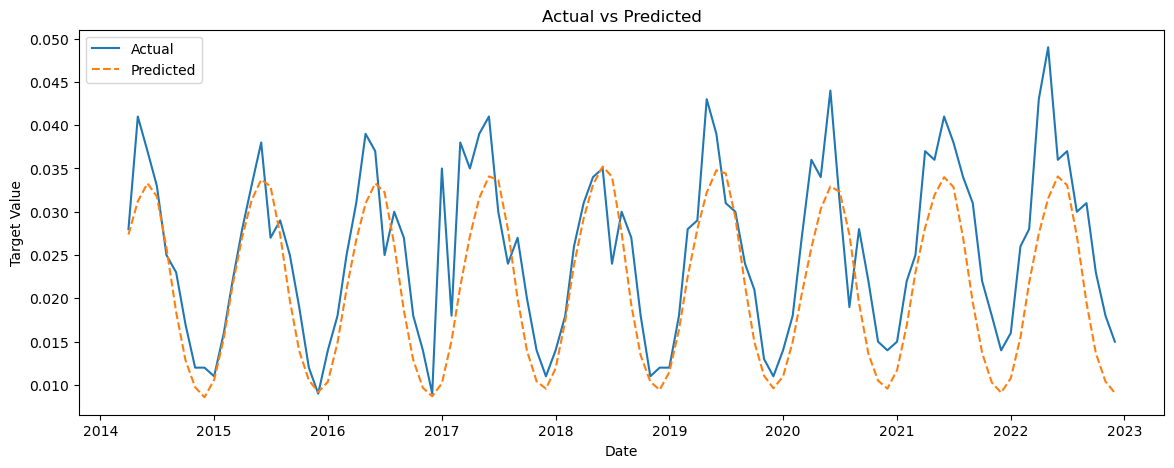

In [740]:
# 날짜 배열 조정: 끝에서 236개 데이터 포인트 선택
adjusted_test_dates = test_dates[-(len(testY_transformed)):]

# 결과 시각화
plt.figure(figsize=(14, 5))
plt.plot(adjusted_test_dates, testY_transformed, label='Actual')
plt.plot(adjusted_test_dates, prediction_transformed, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


그래프에 나타난 점이 중복되어 보이는 경우, 몇 가지 가능한 원인이 있을 수 있습니다:

데이터 중복: 같은 날짜에 대해 두 개 이상의 데이터 포인트가 있을 수 있습니다. 이것은 데이터셋 내의 중복된 행이나 데이터의 집계 방식에 오류가 있을 때 발생할 수 있습니다.

데이터 포인트의 겹침: 예측값과 실제값이 유사하여 그래프 상에서 겹쳐 보일 수 있습니다. 만약 실제값과 예측값이 거의 일치한다면, 두 선이 겹쳐져서 한 선처럼 보이지 않고, 별도의 점으로 나타날 수 있습니다.

시각화 코드: 시각화 코드가 같은 날짜에 대해 여러 점을 그리도록 구현되었을 수 있습니다. 예를 들어, plt.plot() 함수에 같은 날짜가 여러 번 나타날 경우 이런 현상이 발생할 수 있습니다.

데이터 전처리 오류: 데이터 전처리 과정에서 예측값이나 실제값 배열을 생성할 때 어떤 실수로 인해 데이터가 잘못된 위치에 할당되었을 수도 있습니다.

이 현상을 정확히 파악하려면 데이터와 시각화 코드를 자세히 검토할 필요가 있습니다. 일단 데이터프레임에 중복된 날짜가 있는지 확인하고, 이를 제거하는 것이 좋습니다. 중복을 확인하려면 다음과 같은 코드를 사용할 수 있습니다:

In [ ]:
# 날짜별로 데이터가 중복되었는지 확인
duplicates = result_df.index.duplicated()
print("Number of duplicates in the index: ", duplicates.sum())

Number of duplicates in the index:  0


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 19ms/step


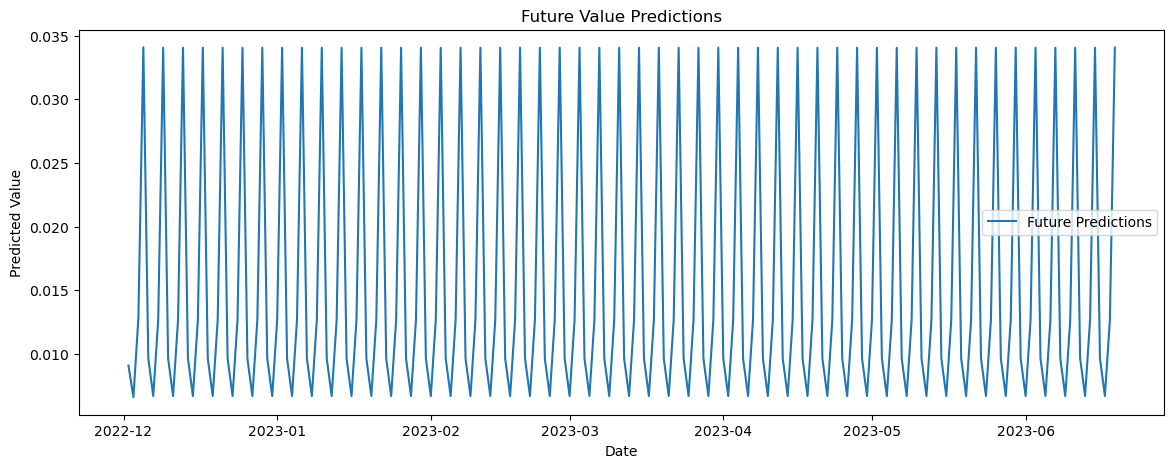

In [747]:
def predict_future(model, initial_seq, future_steps, seq_len, input_dim):
    current_seq = initial_seq.copy()
    future_predictions = []

    for _ in range(future_steps):
        current_seq_reshaped = current_seq.reshape(1, seq_len, input_dim)
        next_prediction = model.predict(current_seq_reshaped)
        future_predictions.append(next_prediction[0, 0])

        # 다음 시퀀스 업데이트: 마지막 시퀀스 제거, 새로운 예측 추가
        current_seq = np.roll(current_seq, -input_dim, axis=0)
        current_seq[-1, :] = np.zeros(input_dim)
        current_seq[-1, 0] = next_prediction[0, 0]

    return future_predictions

# 함수 사용
future_steps = 200
latest_sequence = testX[-1]  # 가장 최근 시퀀스
future_predictions = predict_future(model, latest_sequence, future_steps, 20, input_dim)


# 예측된 값들을 원래 데이터셋과 동일한 차원으로 확장
extended_predictions = np.zeros((len(future_predictions), data_scaled.shape[1]))
extended_predictions[:, 0] = future_predictions

# 역변환을 통해 원래 스케일로 변환
future_predictions_transformed = scaler.inverse_transform(extended_predictions)[:, 0]

# 미래 날짜 생성
future_dates = pd.date_range(start=test_dates[-1], periods=future_steps + 1)[1:]

# 결과 시각화
plt.figure(figsize=(14, 5))
plt.plot(future_dates, future_predictions_transformed, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.title('Future Value Predictions')
plt.legend()
plt.show()
